# Dataset boolean10: AP conjoined by or

Generating sentences of the form

- 1) **c's painting is P or Q, c's painting is neither P nor Q** (contradiction)

- 2) **c's painting is P or Q, c's painting isn't P and c's paiting isn't Q** (contradiction)

- 3) **c's painting is P or Q, c's painting isn't P (Q)** (non-contradiction)

- 4) **c's painting is P or Q, d's (c's) painting is neither P (W) nor Q (W)** (non-contradiction)


In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, all_attributes
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
def get_new_item(item_list, src_list):
    size = len(src_list)
    new_item = src_list[np.random.choice(size)]
    while new_item in item_list: 
        new_i = np.random.choice(size)
        new_item = src_list[new_i]
    return new_item

In [3]:
upper_bound = 11000 / 4
vowels = 'aeiou'

### Generating all types of sentences

- 1) **c's painting is P or Q, c's painting is neither P nor Q** (contradiction)

In [4]:
all_sentences_1 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    sentence = "{}'s painting is {} or {}, {}'s painting is neither {} nor {}".format(person,
                                                                                      pred1,
                                                                                      pred2,
                                                                                      person,
                                                                                      pred1,
                                                                                      pred2)
    all_sentences_1.append(sentence)

all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)

["Cody's painting is gray or calm", " Cody's painting is neither gray nor calm", 1]
["Milton's painting is poor or victorious", " Milton's painting is neither poor nor victorious", 1]
["Andre's painting is embarrassed or ambitious", " Andre's painting is neither embarrassed nor ambitious", 1]
["Scott's painting is nice or uptight", " Scott's painting is neither nice nor uptight", 1]
["Gloria's painting is magnificent or aggressive", " Gloria's painting is neither magnificent nor aggressive", 1]
["Terrence's painting is drab or skinny", " Terrence's painting is neither drab nor skinny", 1]
["Dwayne's painting is plain or delightful", " Dwayne's painting is neither plain nor delightful", 1]
["Jerry's painting is purple or unimportant", " Jerry's painting is neither purple nor unimportant", 1]
["Terri's painting is fit or magnificent", " Terri's painting is neither fit nor magnificent", 1]
["Kelly's painting is famous or handsome", " Kelly's painting is neither famous nor handsome", 1]


- 2) **c's painting is P or Q, c's painting isn't P and c's paiting isn't Q** (contradiction)

In [5]:
all_sentences_2 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    sentence = "{}'s painting is {} or {}, {}'s painting isn't {} and {}'s painting isn't {}".format(person,
                                                                                                     pred1,
                                                                                                     pred2,
                                                                                                     person,
                                                                                                     pred1,
                                                                                                     person,
                                                                                                     pred2)
    all_sentences_2.append(sentence)

all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)

["Paul's painting is mushy or alive", " Paul's painting isn't mushy and Paul's painting isn't alive", 1]
["Chris's painting is silly or muscular", " Chris's painting isn't silly and Chris's painting isn't muscular", 1]
["Lillie's painting is drab or easy", " Lillie's painting isn't drab and Lillie's painting isn't easy", 1]
["Heidi's painting is eager or chubby", " Heidi's painting isn't eager and Heidi's painting isn't chubby", 1]
["Eddie's painting is silly or unsightly", " Eddie's painting isn't silly and Eddie's painting isn't unsightly", 1]
["Inez's painting is uptight or odd", " Inez's painting isn't uptight and Inez's painting isn't odd", 1]
["Jane's painting is lively or kind", " Jane's painting isn't lively and Jane's painting isn't kind", 1]
["Wayne's painting is gentle or nervous", " Wayne's painting isn't gentle and Wayne's painting isn't nervous", 1]
["Kelly's painting is clumsy or scary", " Kelly's painting isn't clumsy and Kelly's painting isn't scary", 1]
["Kirk's paint

- 3) **c's painting is P or Q, c's painting isn't P (Q)** (non-contradiction)

In [6]:
all_sentences_3 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    if i % 2 == 0:
        pred_p = pred1
    else:
        pred_p = pred2
        
    sentence = "{}'s painting is {} or {}, {}'s painting isn't {}".format(person,
                                                                          pred1,
                                                                          pred2,
                                                                          person,
                                                                          pred_p)
    all_sentences_3.append(sentence)

all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)

["Robert's painting is fierce or itchy", " Robert's painting isn't fierce", 0]
["Clifton's painting is victorious or stocky", " Clifton's painting isn't stocky", 0]
["Tracey's painting is obedient or clever", " Tracey's painting isn't obedient", 0]
["Julian's painting is uptight or easy", " Julian's painting isn't easy", 0]
["Everett's painting is polite or nervous", " Everett's painting isn't polite", 0]
["Stacey's painting is itchy or thoughtless", " Stacey's painting isn't thoughtless", 0]
["Kirk's painting is happy or fit", " Kirk's painting isn't happy", 0]
["Roberta's painting is nice or jealous", " Roberta's painting isn't jealous", 0]
["Marilyn's painting is ambitious or clean", " Marilyn's painting isn't ambitious", 0]
["Brad's painting is gifted or lazy", " Brad's painting isn't lazy", 0]


- 4) **c's painting is P or Q, d's (c's) painting is neither P (W) nor Q (W)** (non-contradiction)

In [7]:
all_sentences_4 = []
for i in range(int(upper_bound)):
    person = get_new_item([], name_list)
    other_person = get_new_item([person], name_list) 
    pred1 = get_new_item([], all_attributes)
    pred2 = get_new_item([pred1], all_attributes)
    pred3 = get_new_item([pred1, pred2], all_attributes)
    
    if i % 2 == 0:
        person_p = other_person
        pred_p_1 = pred1
        pred_p_2 = pred2
    else:
        if i % 3 == 0:
            person_p = person
            pred_p_1 = pred1
            pred_p_2 = pred3
        else:
            person_p = person
            pred_p_1 = pred3
            pred_p_2 = pred2
    
    sentence = "{}'s painting is {} or {}, {}'s painting is neither {} nor {}".format(person,
                                                                                      pred1,
                                                                                      pred2,
                                                                                      person_p,
                                                                                      pred_p_1,
                                                                                      pred_p_2)
    all_sentences_4.append(sentence)

all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)

["Marc's painting is delightful or red", " Tommy's painting is neither delightful nor red", 0]
["Johnny's painting is icy or salmon", " Johnny's painting is neither stocky nor salmon", 0]
["Iris's painting is thoughtless or quaint", " Myrtle's painting is neither thoughtless nor quaint", 0]
["Marc's painting is agreeable or happy", " Marc's painting is neither agreeable nor obnoxious", 0]
["Howard's painting is rich or lemon", " Hazel's painting is neither rich nor lemon", 0]
["Nellie's painting is dead or chubby", " Nellie's painting is neither brave nor chubby", 0]
["Billie's painting is delightful or ashy", " Joel's painting is neither delightful nor ashy", 0]
["Marie's painting is chubby or black", " Marie's painting is neither beautiful nor black", 0]
["Dwayne's painting is ashy or unsightly", " Florence's painting is neither ashy nor unsightly", 0]
["Eric's painting is handsome or important", " Eric's painting is neither handsome nor itchy", 0]


In [8]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)

size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size1))
print("type 4 size = {}".format(size2))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [9]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Sherri's painting is dead or thoughtless,Sherri's painting isn't dead,0
10996,Melody's painting is red or shy,Melody's painting isn't red and Melody's pain...,1
10997,Marion's painting is lively or ambitious,Samuel's painting is neither lively nor ambit...,0
10998,Joseph's painting is powerful or victorious,Theodore's painting is neither powerful nor v...,0
10999,Verna's painting is hallowed or dazzling,Verna's painting isn't hallowed and Verna's p...,1


#### Looking at the label distribution

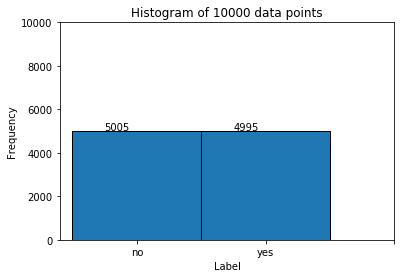

In [10]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "boolean10_train.png")

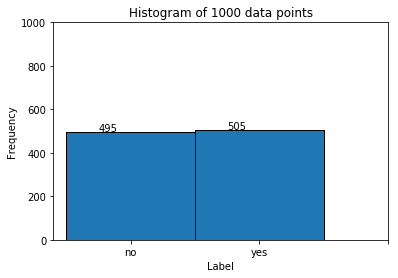

In [11]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "boolean10_test.png")

### Saving to CSV

In [12]:
df_train.to_csv("boolean10_train.csv", index=False)
df_test.to_csv("boolean10_test.csv", index=False)